In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy
import itertools

import numpy as np
from scipy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

from gmm_lbd import *
%matplotlib inline


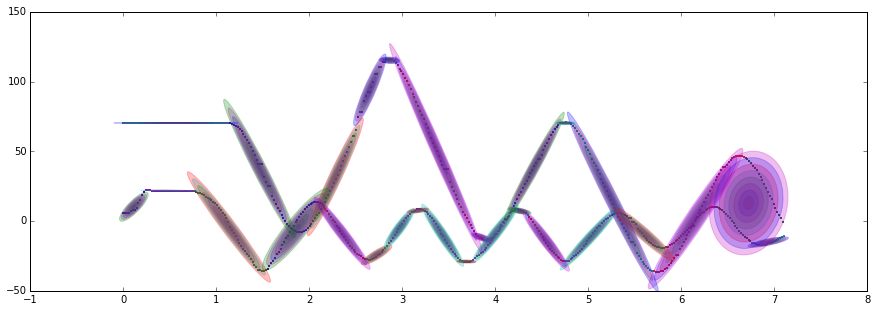

In [2]:
move_m1 = open('records/move_m1.record','r')
move_m2 = open('records/move_m2.record','r')

datas = SanitizeRecordsForGmm(1)

datas.add_move(move_m1)
datas.add_move(move_m2)

datas.plot_ellipses()

29 full


array([ 0.02620109,  0.06015037,  0.05315442,  0.01712043,  0.01036972,
        0.03775918,  0.00893359,  0.01743555,  0.04493198,  0.08062015,
        0.04622521,  0.1036302 ,  0.0095238 ,  0.03628953,  0.06513626,
        0.01699479,  0.02876026,  0.03135883,  0.06239544,  0.02477878,
        0.03656884,  0.03399663,  0.03530077,  0.00084506,  0.0116362 ,
        0.01904243,  0.01011382,  0.05965473,  0.01107192])

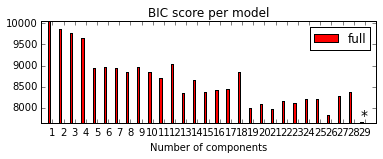

In [3]:
datas.plot_bics()
print datas.gmm.n_components,datas.gmm.covariance_type

datas.gmm.

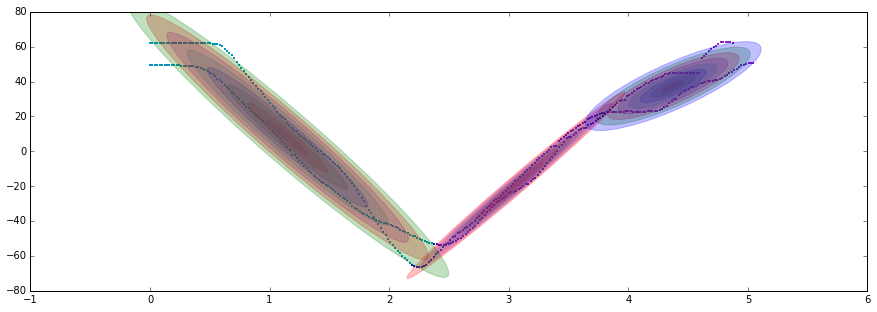

In [4]:
move_m1 = open('records/record_2_1.json','r')
move_m2 = open('records/record_2_2.json','r')

datas = SanitizeRecordsForGmm(1,n_components_range=range(3,4),cv_types=['spherical', 'tied', 'diag', 'full'])
# datas = Sanitize_records_for_gmm(1,cv_types=['spherical', 'tied', 'diag', 'full'])

datas.add_move(move_m1)
datas.add_move(move_m2)

datas.plot_ellipses()

In [5]:
datas.gmm.get_params

<bound method GMM.get_params of GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)>

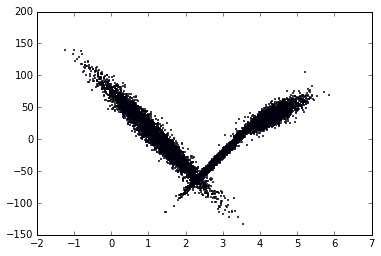

In [6]:
X = datas.gmm.sample(10000)
plt.scatter(X[:, 0], X[:, 1], .8)
